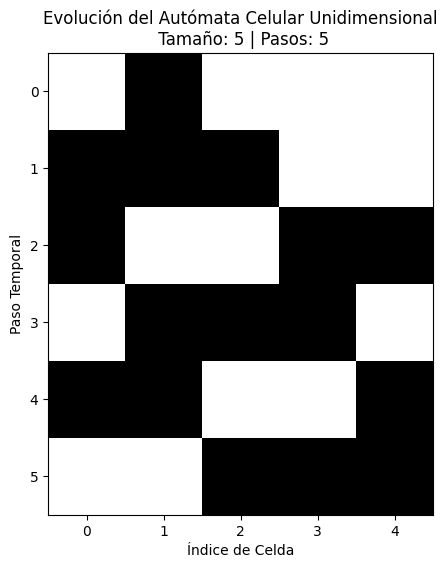

Experimento con Tamaño = 5 y Pasos = 5
Estado inicial: [0, 1, 0, 0, 0]
Evolución:
Paso 0: 01000
Paso 1: 11100
Paso 2: 10011
Paso 3: 01110
Paso 4: 11001
Paso 5: 00111


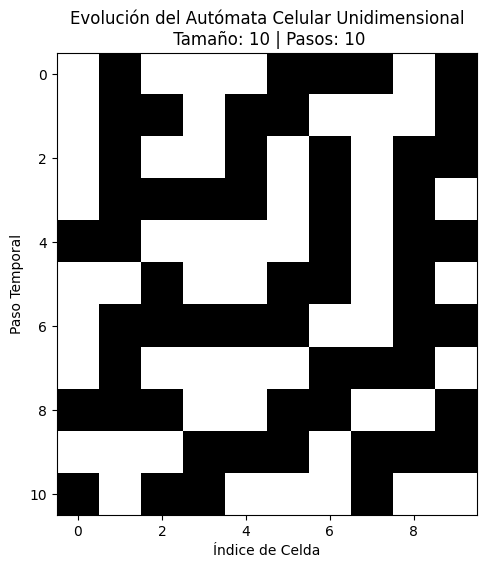

Experimento con Tamaño = 10 y Pasos = 10
Estado inicial: [0, 1, 0, 0, 0, 1, 1, 1, 0, 1]
Evolución:
Paso 0: 0100011101
Paso 1: 0110110001
Paso 2: 0100101011
Paso 3: 0111101010
Paso 4: 1100001011
Paso 5: 0010011010
Paso 6: 0111110011
Paso 7: 0100001110
Paso 8: 1110011001
Paso 9: 0001110111
Paso 10: 1011000100


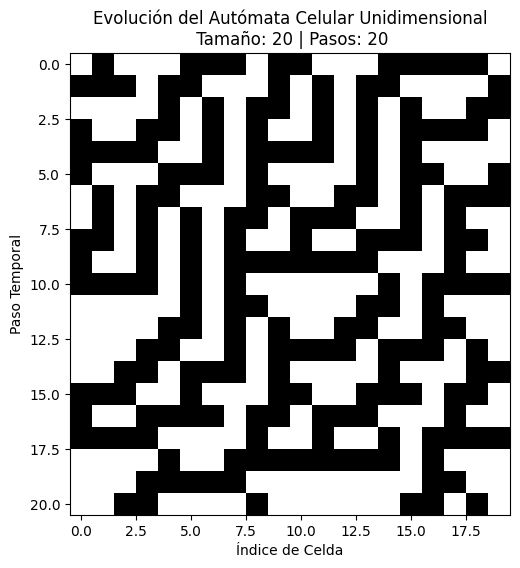

Experimento con Tamaño = 20 y Pasos = 20
Estado inicial: [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
Evolución:
Paso 0: 01000111011000111110
Paso 1: 11101100010101100001
Paso 2: 00001010110101010011
Paso 3: 10011010100101011110
Paso 4: 11110010111101010000
Paso 5: 10001110100001011001
Paso 6: 01011000110011010111
Paso 7: 01010101101110010100
Paso 8: 11010101001001110110
Paso 9: 10010101111111000100
Paso 10: 11110101000000101111
Paso 11: 00000101100001101000
Paso 12: 00001101010011001100
Paso 13: 00011001011110111010
Paso 14: 00110111010000100011
Paso 15: 11100100011001110110
Paso 16: 10011110110111000100
Paso 17: 11110000100100101111
Paso 18: 00001001111111101000
Paso 19: 00011111000000001100
Paso 20: 00110000100000011010


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la regla del autómata como un diccionario
# Regla de Selección:
# [Izquierda, Actual, Derecha] => Nueva Celda
# 000 => 0
# 001 => 1
# 010 => 1
# 011 => 1
# 100 => 1
# 101 => 0
# 110 => 0
# 111 => 0

rule = {
    (0, 0, 0): 0,
    (0, 0, 1): 1,
    (0, 1, 0): 1,
    (0, 1, 1): 1,
    (1, 0, 0): 1,
    (1, 0, 1): 0,
    (1, 1, 0): 0,
    (1, 1, 1): 0
}

def automata_celular(state, steps):
    """
    Simula el autómata celular por un número de pasos.

    :param state: Lista inicial de celdas (0s y 1s).
    :param steps: Número de pasos a simular.
    :return: Lista de estados en cada paso.
    """
    history = [state]  # Historial de estados
    for step in range(steps):
        new_state = []
        for i in range(len(state)):
            # Condición de borde cíclica
            left = state[i - 1] if i > 0 else state[-1]
            center = state[i]
            right = state[i + 1] if i < len(state) - 1 else state[0]
            # Aplicar la regla
            new_state.append(rule[(left, center, right)])
        state = new_state
        history.append(state)
    return history

# Tres experimentos con configuraciones específicas
experiments = [
    {'size': 5, 'steps': 5},   # Experimento 1: 5 celdas y 5 pasos
    {'size': 10, 'steps': 10}, # Experimento 2: 10 celdas y 10 pasos
    {'size': 20, 'steps': 20}  # Experimento 3: 20 celdas y 20 pasos
]

# Realizar los experimentos
for experiment in experiments:
    size = experiment['size']
    steps = experiment['steps']

    # Generar estado inicial aleatorio
    np.random.seed(33)  # Opcional: Para reproducibilidad
    initial_state = np.random.randint(0, 2, size).tolist()

    # Ejecutar el autómata
    result = automata_celular(initial_state, steps)

    # Convertir los resultados a una matriz para graficar
    result_matrix = np.array(result)

    # Graficar los resultados
    plt.figure(figsize=(12, 6))
    plt.imshow(result_matrix, cmap='binary', interpolation='nearest')
    plt.title(f"Evolución del Autómata Celular Unidimensional\n Tamaño: {size} | Pasos: {steps}")
    plt.xlabel("Índice de Celda")
    plt.ylabel("Paso Temporal")
    plt.show()

    # Mostrar los resultados en la consola
    print(f"Experimento con Tamaño = {size} y Pasos = {steps}")
    print("Estado inicial:", initial_state)
    print("Evolución:")
    for step, state in enumerate(result):
        print(f"Paso {step}: {''.join(map(str, state))}")
